<a href="https://colab.research.google.com/github/shrutishibu/python-and-statistics-for-financial-analysis/blob/main/Python_and_Statistics_for_Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple trading strategy using moving averages

In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
#displays plot within the notebook

In [3]:
#read from csv files and store as dataframes
fb = pd.read_csv('/facebook.csv')
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [4]:
#moving averages for simple trading strategy
fb['MA10'] = fb['Close'].rolling(window=10).mean() #fast signal
fb['MA50'] = fb['Close'].rolling(window=50).mean() #slow signal
fb = fb.dropna()
#generate trading signals: long (1) if MA10 > MA50, otherwise 0
fb.loc[:,'Shares'] = (fb['MA10'] > fb['MA50']).astype(int)
#add a column for the next day's closing prices
fb.loc[:,'Close1'] = fb['Close'].shift(-1)
#calculate profit: difference in closing prices if long, otherwise 0
fb.loc[:,'Profit'] = (fb['Close1'] - fb['Close']).where(fb['Shares'] == 1, 0)
fb.head()

<ipython-input-4-70e2232267eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb.loc[:,'Shares'] = (fb['MA10'] > fb['MA50']).astype(int)
<ipython-input-4-70e2232267eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb.loc[:,'Close1'] = fb['Close'].shift(-1)


,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit
49,2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174,1,22.969999,0.269998
50,2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758,1,23.250000,0.280001
51,2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382,1,22.870001,-0.379999
52,2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998,1,23.219999,0.349998
53,2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804,1,23.469999,0.250000


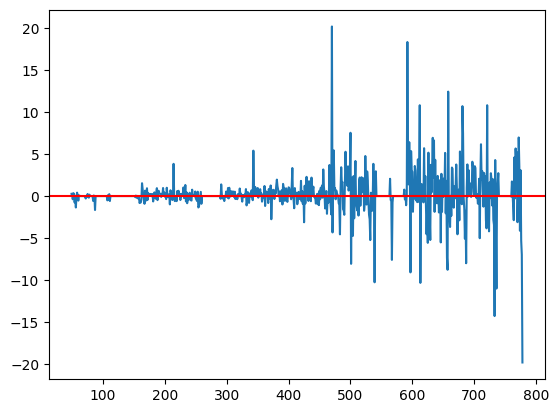

In [5]:
#plotting profit
fb['Profit'].plot()
plt.axhline(y=0, color='red')

In [6]:
#calculating accumalated wealth
fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

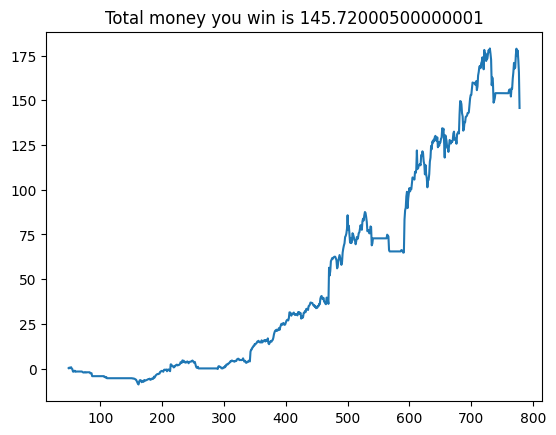

In [7]:
#plotting wealth to show growth of profit
fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

# Models of stock return

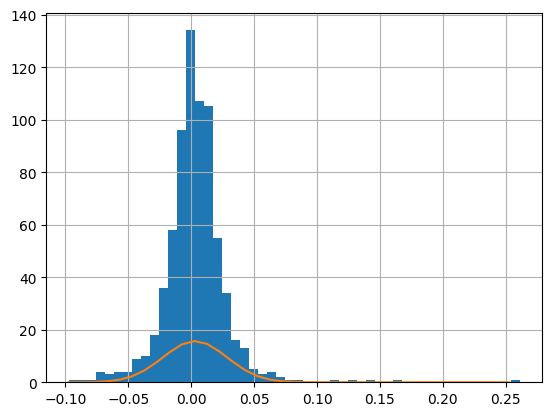

In [8]:
#calculating log returns
fb['log_return'] = np.log(fb['Close1']) - np.log(fb['Close'])
#plotting histogram of log return
mu = fb['log_return'].mean()
sigma = fb['log_return'].std(ddof=1)
density = pd.DataFrame()
density['X'] = np.arange(fb['log_return'].min(), fb['log_return'].max(), 0.01)
density['pdf'] = norm.pdf(density['X'], mu, sigma)
fb['log_return'].hist(bins=50)
plt.plot(density['X'], density['pdf'])
plt.show()

In [9]:
#probability whether stock price would fall in a certain day by 5%
prob_1 = norm.cdf(-0.05, mu, sigma)
print(prob_1)
#probability whether stock price would fall in a certain day by 10%
prob_2 = norm.cdf(-0.1, mu, sigma)
print(prob_2)

0.018470493120562904
2.538216190161333e-05


In [10]:
#probability that stock price would fall in a year
#there are 220 estimated days in the market in a year
mu220 = 220*mu
sigma220 = (220**0.5)*sigma
prob_year = norm.cdf(-0.2, mu220, sigma220)
print(prob_year)

0.010139810688150242


In [11]:
#calculating value at risk
#single day VaR
#also called 5% quantile (change percentage accordingly)
var = norm.ppf(0.05, mu, sigma)
print(var)

-0.038768121078891875


# Sampling and interference

In [30]:
#sampling and finding statistics of logreturn
sample_size = fb['log_return'].shape[0]
sample_mean = fb['log_return'].mean() #sample mean
sample_std = fb['log_return'].std(ddof=1) #sample standard deviation
sample_sem = fb['log_return'].std(ddof=1) / sample_size**0.5 #sample standard error of mean

#90% confidence interval
#left and right quantile
z_left = norm.ppf(0.05, sample_mean, sample_std)
z_right = norm.ppf(0.95, sample_mean, sample_std)
#upper and lower bound
lower_bound = sample_mean - z_left * sample_std
upper_bound = sample_mean + z_right * sample_std
print("90% Confidence interval is in the interval: ", (lower_bound, upper_bound))

90% Confidence interval is in the interval:  (0.004057650904957924, 0.004213909437491045)


# Hypothesis testing
1. Setting up hypothesis

> H0:μ=0 - Null Hypothesis

> Ha:μ≠0 - Alternate Hypothesis

> H0 means the average stock return is 0 Ha means the average stock return is not equal to 0

2. Calculate test statistic

3. Set decision criteria

4. Make decision - shall we reject H0?

In [31]:
zhat = sample_mean / (sample_std / np.sqrt(sample_size))
print(zhat)

3.2647586982815935


In [32]:
alpha = 0.05 #confidence level
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft #zright is negative of zleft
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


In [33]:
print("At significance level {}, should we reject null hypothesis: {} ".format(alpha, zhat>zright or zhat<zleft ))

At significance level 0.05, should we reject null hypothesis: True 


In [34]:
#Alternate method: Checking using pvalue
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.0005477868305843181


In [35]:
print("At significance level {}, should we reject null hypothesis: {} ".format(alpha, p<alpha))

At significance level 0.05, should we reject null hypothesis: True 


# Linear regression models for Financial Analysis